# CUSTOMER CHURN PREDICTION MODEL

## Context
Customer churn is one of the biggest problem of any industry. In this project, I did an exploratory data analysis and built a prediction model to determine which customers are most likely to churn. 

## Data Understanding
The dataset used here is the [Telco customer churn dataset](https://community.ibm.com/accelerators/catalog/content/Telco-customer-churn) from IBM.

In [1]:
# Import libraries required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the data from the excel file
df = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/data/telco_customer_churn.xlsx')

### Describe Data

In [6]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [7]:
df.shape

(7043, 33)

In [8]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [9]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [11]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


### Verify data Quality

In [12]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [13]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [14]:
missing_values_table(df)

Your selected dataframe has 33 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Churn Reason,5174,73.5


Now, I will remove the columns that is not be used in the analysis.

In [18]:
df = df.drop(columns=['CustomerID','Count', 'Zip Code', 'Country', 'State', 'City', 'Lat Long', 'Latitude', 'Longitude', 
                      'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'])
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


## Initial Data Exploration

In [28]:
plt.style.use('fivethirtyeight')
sns.set_palette("colorblind")

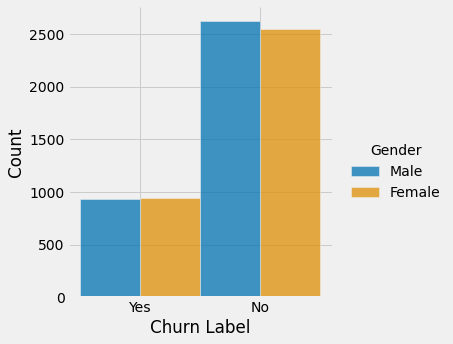

In [29]:
sns.displot(df, x='Churn Label', hue='Gender', multiple='dodge')

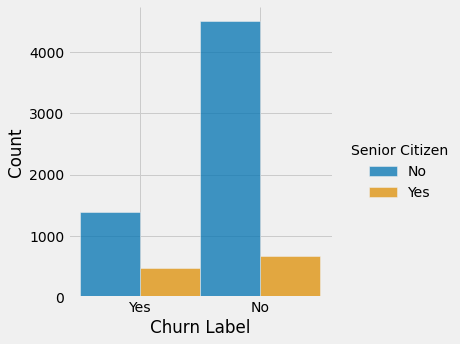

In [30]:
sns.displot(df, x='Churn Label', hue='Senior Citizen', multiple='dodge')

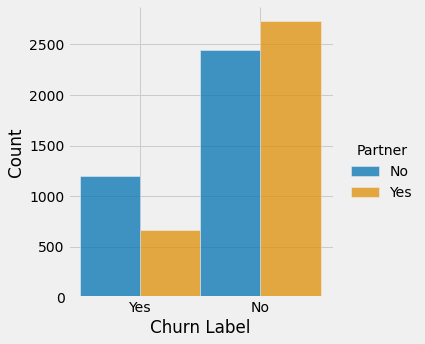

In [31]:
sns.displot(df, x='Churn Label', hue='Partner', multiple='dodge')

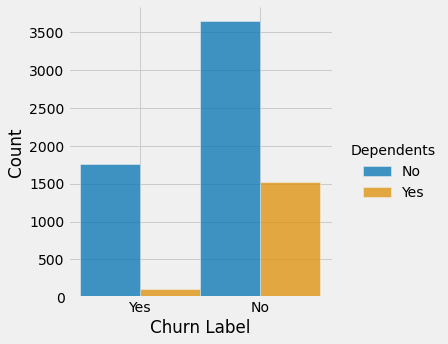

In [32]:
sns.displot(df, x='Churn Label', hue='Dependents', multiple='dodge')

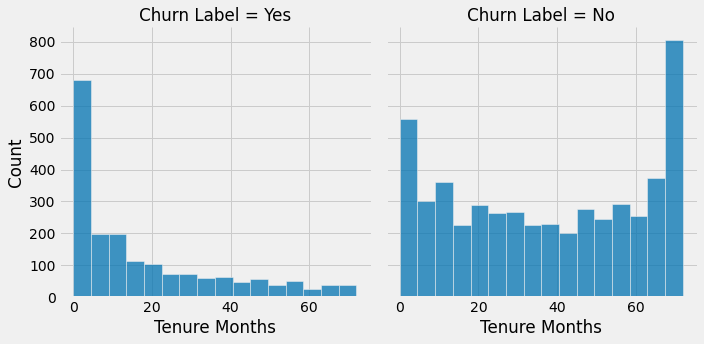

In [33]:
sns.displot(df, x='Tenure Months', col='Churn Label')

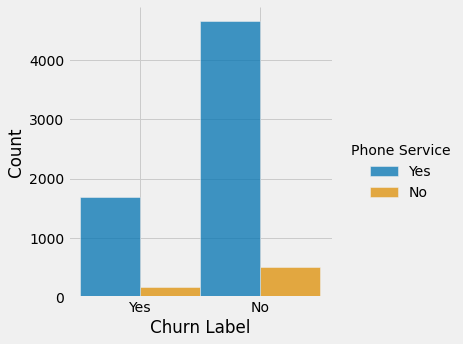

In [34]:
sns.displot(df, x='Churn Label', hue='Phone Service', multiple='dodge')

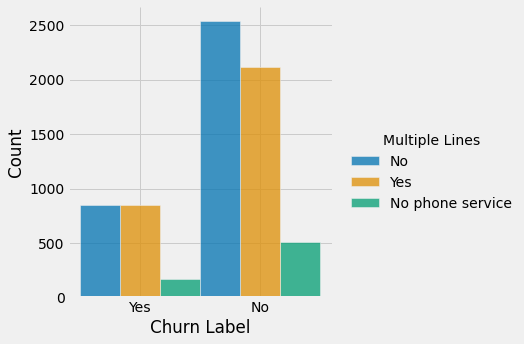

In [35]:
sns.displot(df, x='Churn Label', hue='Multiple Lines', multiple='dodge')

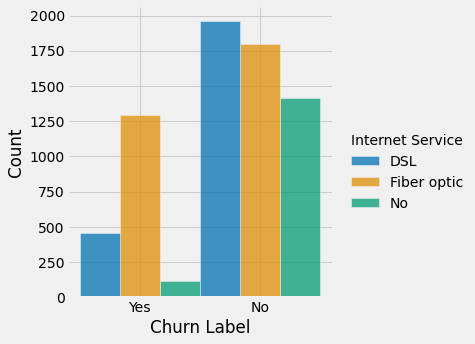

In [36]:
sns.displot(df, x='Churn Label', hue='Internet Service', multiple='dodge')

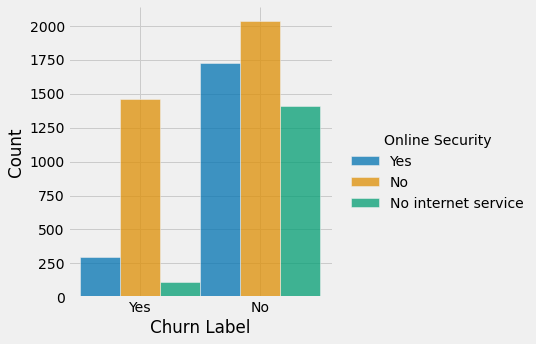

In [37]:
sns.displot(df, x='Churn Label', hue='Online Security', multiple='dodge')

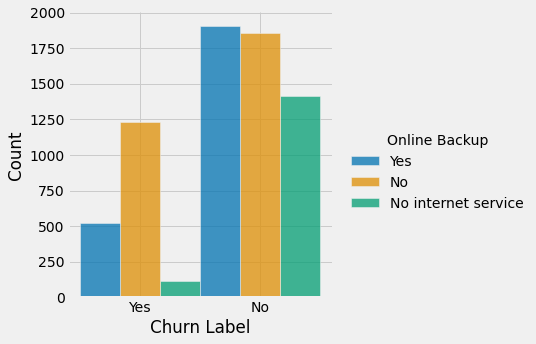

In [38]:
sns.displot(df, x='Churn Label', hue='Online Backup', multiple='dodge')

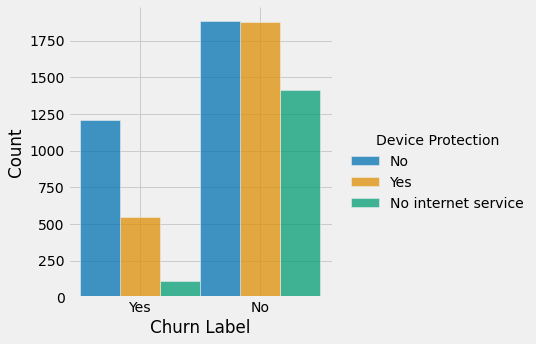

In [39]:
sns.displot(df, x='Churn Label', hue='Device Protection', multiple='dodge')

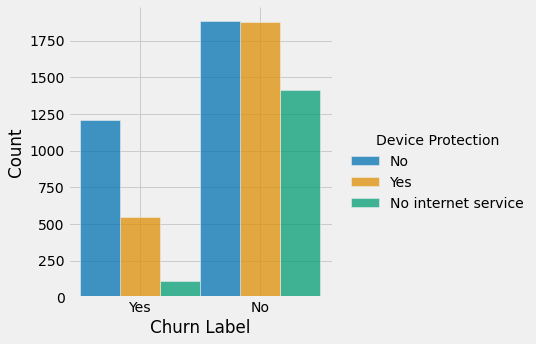

In [40]:
sns.displot(df, x='Churn Label', hue='Device Protection', multiple='dodge')

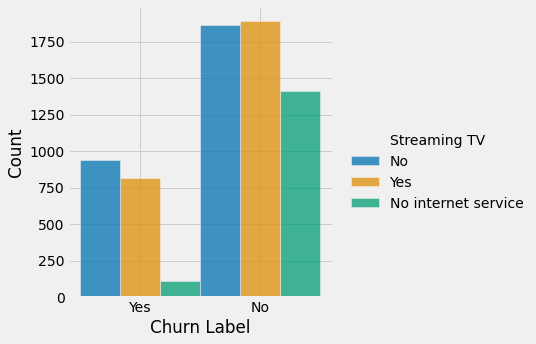

In [41]:
sns.displot(df, x='Churn Label', hue='Streaming TV', multiple='dodge')

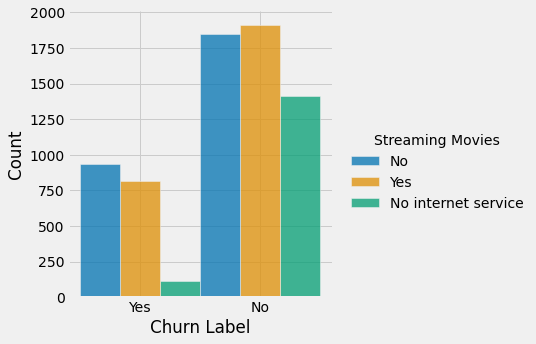

In [42]:
sns.displot(df, x='Churn Label', hue='Streaming Movies', multiple='dodge')

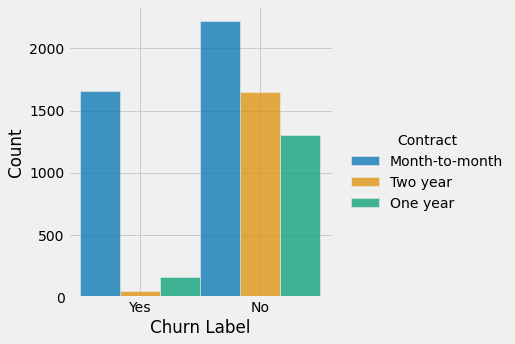

In [43]:
sns.displot(df, x='Churn Label', hue='Contract', multiple='dodge')

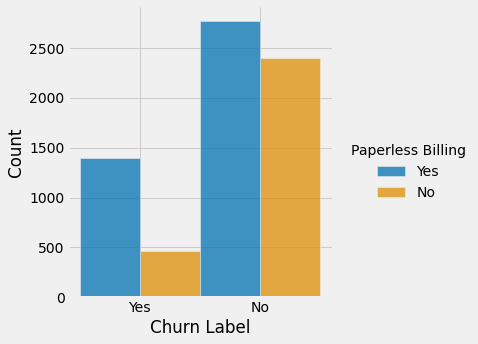

In [44]:
sns.displot(df, x='Churn Label', hue='Paperless Billing', multiple='dodge')

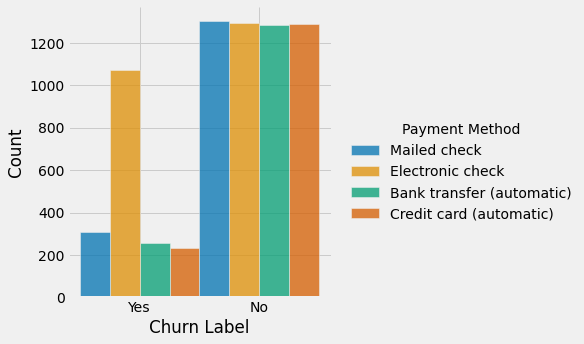

In [45]:
sns.displot(df, x='Churn Label', hue='Payment Method', multiple='dodge')

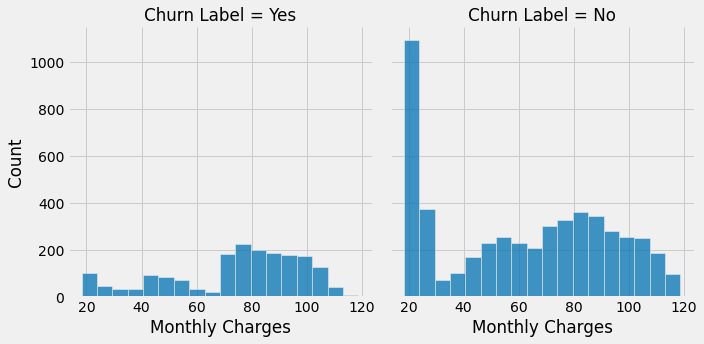

In [46]:
sns.displot(df, x='Monthly Charges', col='Churn Label')

## Data Preparation

**Label Encoding**

In [48]:
df1 = pd.get_dummies(df, columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
                                    'Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV',
                                    'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label'])

**Drop unnecessary columns**

In [50]:
df1 = df1.drop(columns = ['Gender_Male', 'Senior Citizen_No', 'Partner_No', 'Dependents_No', 'Phone Service_No', 
                          'Paperless Billing_No', 'Churn Label_No'])

**Altering Data Types**

In [52]:
df1['Total Charges'] = pd.to_numeric(df1['Total Charges'], errors='coerce')
df1['Total Charges']=df1['Total Charges'].fillna(0)

## Build Model

In [53]:
X = df1.drop(columns = ['Churn Label_Yes'])
y = df1['Churn Label_Yes'].values

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 40, stratify=y)

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8063600227143668


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [56]:
from sklearn.metrics import classification_report
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1294
           1       0.64      0.63      0.63       467

    accuracy                           0.81      1761
   macro avg       0.75      0.75      0.75      1761
weighted avg       0.81      0.81      0.81      1761



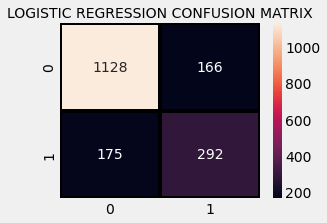

In [57]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

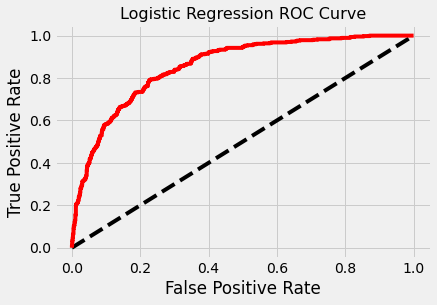

In [58]:
from sklearn.metrics import roc_curve
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

### XGBoost

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, y_train)
xg_pred = model.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, xg_pred))

Gradient Boosting Classifier 0.8109028960817717


In [60]:
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1294
           1       0.66      0.58      0.62       467

    accuracy                           0.81      1761
   macro avg       0.76      0.74      0.75      1761
weighted avg       0.80      0.81      0.81      1761



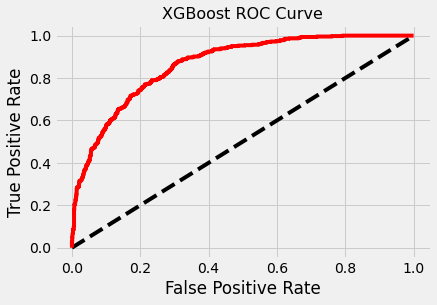

In [61]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='XGBoost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve',fontsize=16)
plt.show();

Text(0.5, 0, 'Xgboost Feature Importance')

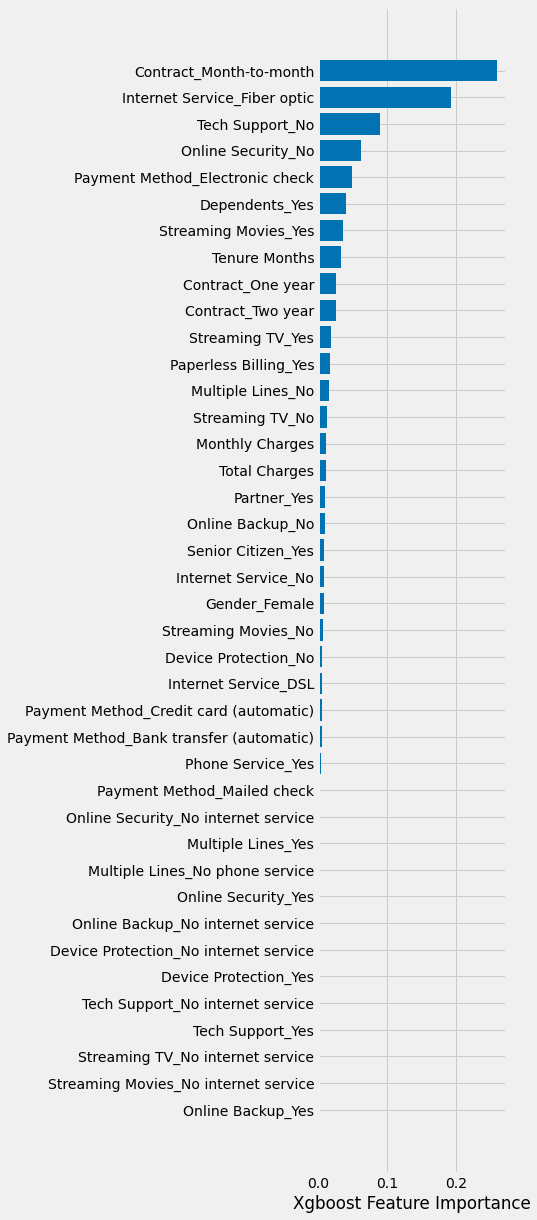

In [62]:
sorted_idx = model.feature_importances_.argsort()
sorted_idx = sorted_idx[:]
plt.figure(figsize=(3,20)) 
plt.barh(df1.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

